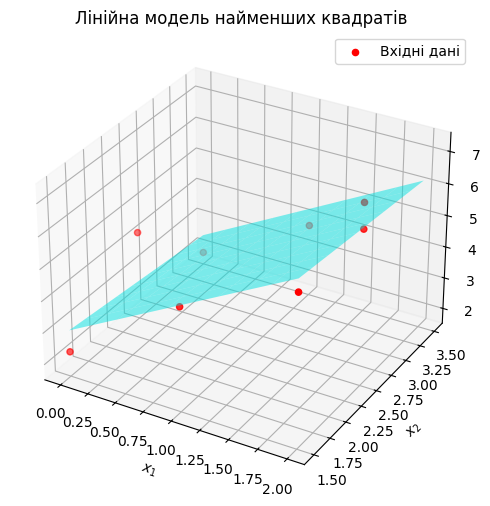

Рівняння регресії: y = 3.359 + 1.858*x1 + -0.250*x2
Значення функції у точці (1.5, 3): 5.398
Коефіцієнт детермінації R^2: 0.837


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Вхідні дані з таблиці для n=1
x1 = np.array([0, 0, 0, 1, 1, 2, 2, 2])
x2 = np.array([1.5, 2.5, 3.5, 1.5, 3.5, 1.5, 2.5, 2.5])
y = np.array([2.3, 4.3, 1.9, 4.8, 3.8, 6.3, 6.4, 7.2])

# Кількість точок
n = len(y)

# Обчислення коефіцієнтів a0, a1, a2 методом найменших квадратів
# Матриця коефіцієнтів A і вектор правої частини B
A = np.array([
    [n, np.sum(x1), np.sum(x2)],
    [np.sum(x1), np.sum(x1**2), np.sum(x1*x2)],
    [np.sum(x2), np.sum(x1*x2), np.sum(x2**2)]
])

B = np.array([
    np.sum(y),
    np.sum(x1*y),
    np.sum(x2*y)
])

# Розв'язок системи рівнянь
coeffs = np.linalg.solve(A, B)
a0, a1, a2 = coeffs

# Функція для обчислення y
def model(x1, x2):
    return a0 + a1 * x1 + a2 * x2

# Обчислення значення функції у точці (x1=1.5, x2=3)
x1_test, x2_test = 1.5, 3
y_predicted = model(x1_test, x2_test)

# Обчислення R^2
y_mean = np.mean(y)
SS_tot = np.sum((y - y_mean)**2)
SS_res = np.sum((y - model(x1, x2))**2)
R2 = 1 - (SS_res / SS_tot)

# Побудова графіка
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, color='red', label='Вхідні дані')

# Побудова площини регресії
X1_grid, X2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                               np.linspace(min(x2), max(x2), 10))
Y_grid = model(X1_grid, X2_grid)
ax.plot_surface(X1_grid, X2_grid, Y_grid, alpha=0.5, color='cyan')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.set_title('Лінійна модель найменших квадратів')
plt.legend()
plt.show()


# Вивід результатів
print(f'Рівняння регресії: y = {a0:.3f} + {a1:.3f}*x1 + {a2:.3f}*x2')
print(f'Значення функції у точці (1.5, 3): {y_predicted:.3f}')
print(f'Коефіцієнт детермінації R^2: {R2:.3f}')